In [1]:
import bogo as bg
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.special import factorial as fac

mu = 0.99
M = np.array([[1,-mu],[-mu,1]])

na = np.array([0,2])
nb = np.array([0,2])
nA = np.array([1,1])

prod_ab = bg.ab(na,nb,M)
# prod_bA = bg.bA(nb,nA,M)
# prod_aA = bg.aA(na,nA,M)

print(prod_ab)
# print(prod_bA)
# print(prod_aA)




0.4999999999999999


In [3]:
ma = np.array([0,2])
mb = np.array([0,2])
t0 = time.time()
prod_ab = bg.ab(ma,mb,M)
# prod_bA = bg.bA(nb,nA,M)
# prod_aA = bg.aA(na,nA,M)
t1 = time.time()

print(prod_ab)
print("Time = {}".format(t1-t0))

0.4999999999999999
Time = 0.0


Here some known results using v1,v3 for ab:

ab([0,2],[0,2])=0.5

ab([0,0],[0,0])=1

ab([2,1],[0,3])=-0.6123724356957946

ab([2,4],[5,1])=-0.3952847075210471

ab([4,4],[4,4])=0.375

Here some known results using v2,v3 for ab:

ab([0,2],[0,2])=0.5

ab([0,0],[0,0])=1

ab([2,1],[0,3])=-0.6123724356957946

ab([2,4],[5,1])=-0.3952847075210471

ab([4,4],[4,4])=0.375

The time spent for each computed value is on your notes.

Let's add the multipermute package made by Joe and see how it's its performance:

Time ab([0,2],[0,2])=0.0009980201721191406

Time ab([0,0],[0,0]) --> Error: index 0 is out of bounds for axis 0 with size 0

Time ab([2,1],[0,3])=0.001004934310913086

Time ab([2,4],[5,1])=0.0010018348693847656

Time ab([4,4],[4,4])=0.0049974918365478516 <-- From this point this is an improvement with respect to the previous code!

Time ab([6,6],[10,2])=0.004355669021606445

Time ab([20,0],[10,10])=12.460918426513672

By modifying the ab function (including by hand the ground-ground case) the error doesn't appear anymore.

ab([0,0],[0,0])=1.0
Time ab([0,0],[0,0]) = 0.0010008811950683594

In [2]:
na = np.array([0,1,11])
nbs = bg.n_subspace(len(na),np.sum(na))
matrix = np.array([[1,-mu,0],[-mu,1+mu,-mu],[0,-mu,1]])
res = []
for nb in nbs:
#     print(nb)
#     print(bg.ab(na,nb,matrix))
    res.append(bg.ab(na,nb,matrix)**2)

plt.plot(res,'.')
plt.plot(res)
plt.grid()
plt.title('{}'.format(na))
plt.show()



KeyboardInterrupt: 

In [9]:
res = np.array(res)
print(len(res[res<1e-10]))

0


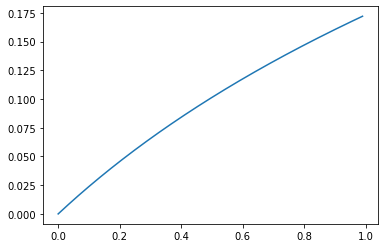

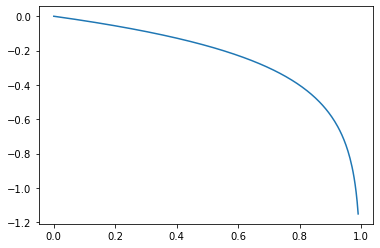

0.17203365968410034
-1.1512925464970223


In [3]:
Mu = np.linspace(0,0.99,300)
omega_p = np.sqrt(Mu+1)
omega_m = np.sqrt(1-Mu)
eta_p = np.arctanh((omega_p-1)/(omega_p+1))
eta_m = np.arctanh((omega_m-1)/(omega_m+1))

plt.plot(Mu,eta_p)
plt.show()
plt.plot(Mu,eta_m)
plt.show()

print(np.max(eta_p))
print(np.min(eta_m))

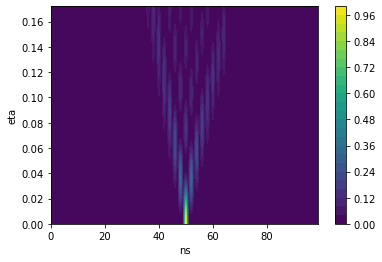

In [5]:
m = 50
ns = np.arange(0,100)

# NS,ETA = np.meshgrid(ns,eta_m)
NS,ETA = np.meshgrid(ns,eta_p)

PROB = (np.vectorize(bg.fast_single)(m,NS,ETA))**2

# plt.contourf(ns,-eta_m,PROB,levels=30)
# plt.ylabel('- eta')

plt.contourf(ns,eta_p,PROB,levels=30)
plt.ylabel('eta')

plt.xlabel('ns')
plt.colorbar()

# plt.vlines(m,np.max(eta_m),-np.min(eta_m),'red')
# plt.vlines(m+20,np.max(eta_m),-np.min(eta_m),'white',linestyle='dashed')
# plt.vlines(m-20,np.max(eta_m),-np.min(eta_m),'white',linestyle='dashed')

# plt.vlines(m,np.min(eta_p),np.max(eta_p),'red')
# plt.vlines(m+15,np.min(eta_p),np.max(eta_p),'white',linestyle='dashed')
# plt.vlines(m-15,np.min(eta_p),np.max(eta_p),'white',linestyle='dashed')

plt.show()

C:\Users\Eric\AppData\Local\Temp\ipykernel_7540\1393016245.py:6: RuntimeWarning: overflow encountered in double_scalars
  prefactor = np.sqrt(fac(m+d)*fac(m))/(np.cosh(eta)**(m+(1+d)/2))
C:\Users\Eric\AppData\Local\Temp\ipykernel_7540\1393016245.py:6: RuntimeWarning: overflow encountered in double_scalars
  prefactor = np.sqrt(fac(m+d)*fac(m))/(np.cosh(eta)**(m+(1+d)/2))
C:\Users\Eric\AppData\Local\Temp\ipykernel_7540\1393016245.py:6: RuntimeWarning: overflow encountered in double_scalars
  prefactor = np.sqrt(fac(m+d)*fac(m))/(np.cosh(eta)**(m+(1+d)/2))


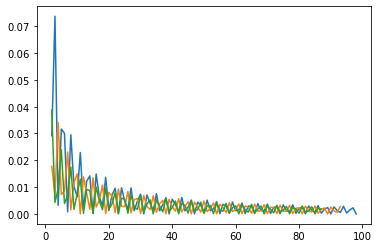

In [37]:
eta = 1.6
ms = np.arange(2,100)
def tema(d):
    result = []
    for m in ms:
        prefactor = np.sqrt(fac(m+d)*fac(m))/(np.cosh(eta)**(m+(1+d)/2))
        def term(k,m):
            a = (np.sinh(eta)/2)**(m-k+d/2)
            b = ((-1)**((m-k)/2+d/2))/(fac(k)*fac((m-k)/2)*fac((m-k+d)/2))
            return a*b
        if m%2==0:
            K = np.arange(0,m+1,2)
        else:
            K = np.arange(1,m+1,2)
        Term = np.sum(np.array([term(k,m) for k in K]))
        result.append((prefactor*Term)**2)
    return np.array(result)

plt.plot(ms,tema(0))
plt.plot(ms,tema(10))
plt.plot(ms,tema(20))
# plt.yscale('log')
plt.show()

C:\Users\Eric\AppData\Local\Temp\ipykernel_7540\3252526258.py:2: RuntimeWarning: divide by zero encountered in arctanh
  y = np.arctanh(x)
C:\Users\Eric\AppData\Local\Temp\ipykernel_7540\3252526258.py:2: RuntimeWarning: invalid value encountered in arctanh
  y = np.arctanh(x)


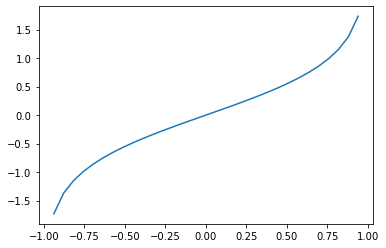

In [47]:
x = np.linspace(-3,3,100)
y = np.arctanh(x)

plt.plot(x,y)
plt.show()